### This code can analyze the probability of a person having a heart attack from certain data using machine learning.

In [78]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn import svm
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score, precision_score

In [3]:
df = pd.read_csv('Attacks.csv')
df.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,Class
0,160,12.00,5.73,23.11,1,49,25.30,97.20,52,2
1,144,0.01,4.41,28.61,2,55,28.87,2.06,63,2
2,118,0.08,3.48,32.28,1,52,29.14,3.81,46,1
3,170,7.50,6.41,38.03,1,51,31.99,24.26,58,2
4,134,13.60,3.50,27.78,1,60,25.99,57.34,49,2


In [5]:
columns = ['sbp','Tabaco','ldl','Adiposity','Family','Type','Obesity','Alcohol','Age','chd'] #Medical stuff
df.columns = columns
df.head()

,sbp,Tabaco,ldl,Adiposity,Family,Type,Obesity,Alcohol,Age,chd
0,160,12.00,5.73,23.11,1,49,25.30,97.20,52,2
1,144,0.01,4.41,28.61,2,55,28.87,2.06,63,2
2,118,0.08,3.48,32.28,1,52,29.14,3.81,46,1
3,170,7.50,6.41,38.03,1,51,31.99,24.26,58,2
4,134,13.60,3.50,27.78,1,60,25.99,57.34,49,2


In [10]:
df.dtypes

sbp            int64
Tabaco       float64
ldl          float64
Adiposity    float64
Family         int64
Type           int64
Obesity      float64
Alcohol      float64
Age            int64
chd            int64
dtype: object

In [11]:
df.isnull().sum()

sbp          0
Tabaco       0
ldl          0
Adiposity    0
Family       0
Type         0
Obesity      0
Alcohol      0
Age          0
chd          0
dtype: int64

In [15]:
encoder = LabelEncoder()
df['Family'] = encoder.fit_transform(df['Family'])
df['chd'] = encoder.fit_transform(df['chd'])
df.head()

,sbp,Tabaco,ldl,Adiposity,Family,Type,Obesity,Alcohol,Age,chd
0,160,12.00,5.73,23.11,0,49,25.30,97.20,52,1
1,144,0.01,4.41,28.61,1,55,28.87,2.06,63,1
2,118,0.08,3.48,32.28,0,52,29.14,3.81,46,0
3,170,7.50,6.41,38.03,0,51,31.99,24.26,58,1
4,134,13.60,3.50,27.78,0,60,25.99,57.34,49,1


In [19]:
scale = MinMaxScaler(feature_range = (0,100))
df['sbp'] = scale.fit_transform(df['sbp'].values.reshape(-1,1))
df.head()

,sbp,Tabaco,ldl,Adiposity,Family,Type,Obesity,Alcohol,Age,chd
0,50.427350,12.00,5.73,23.11,0,49,25.30,97.20,52,1
1,36.752137,0.01,4.41,28.61,1,55,28.87,2.06,63,1
2,14.529915,0.08,3.48,32.28,0,52,29.14,3.81,46,0
3,58.974359,7.50,6.41,38.03,0,51,31.99,24.26,58,1
4,28.205128,13.60,3.50,27.78,0,60,25.99,57.34,49,1


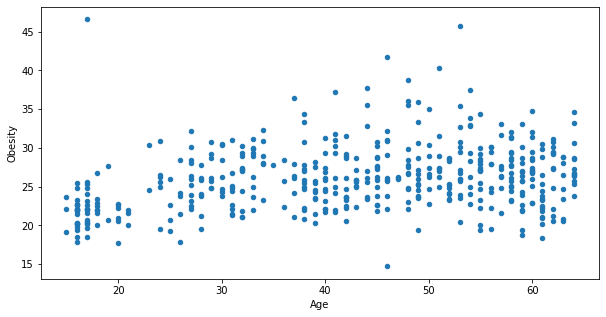

In [25]:
df.plot(x='Age',y='Obesity',kind='scatter',figsize=(10,5))

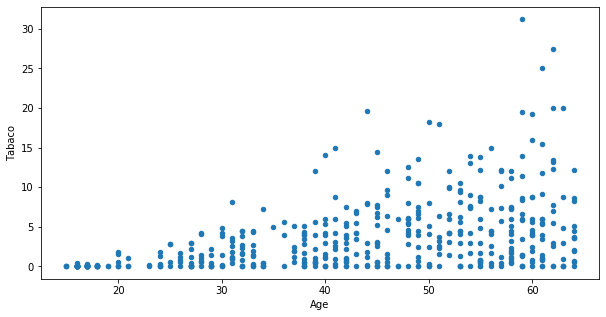

In [26]:
df.plot(x='Age',y='Tabaco',kind='scatter',figsize=(10,5))

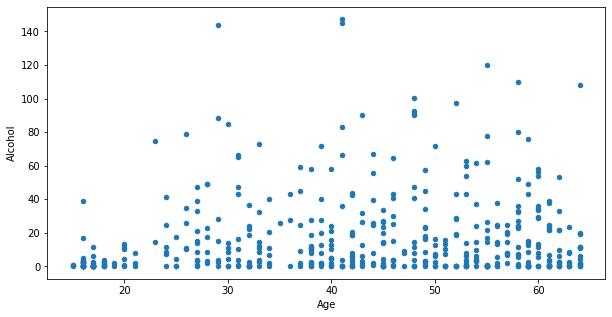

In [27]:
df.plot(x='Age',y='Alcohol',kind='scatter',figsize=(10,5))

In [36]:
y = df['chd']
x = df.drop('chd',axis=1)

In [38]:
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.20,random_state=1)

### We tried various classification methods
# SVM

In [70]:
alg = svm.SVC(kernel='rbf')
alg.fit(x_train,y_train)
y_test_pred= alg.predict(x_test)
print('Confusion matrix')
print(confusion_matrix(y_test,y_test_pred))
print('Accuracy', accuracy_score(y_test,y_test_pred))
print('Presision', precision_score(y_test,y_test_pred))

Confusion matrix
[[60  6]
 [18  9]]
Accuracy 0.7419354838709677
Presision 0.6


### Decision Trees

In [89]:
clf_tree = DecisionTreeClassifier()
clf_tree.fit(x_train,y_train)
y_test_pred= clf_tree.predict(x_test)
print('Confusion matrix')
print(confusion_matrix(y_test,y_test_pred))
print('Accuracy', accuracy_score(y_test,y_test_pred))
print('Presision', precision_score(y_test,y_test_pred))

Confusion matrix
[[53 13]
 [15 12]]
Accuracy 0.6989247311827957
Presision 0.48


### Logistic Regression

In [88]:
clf_log = LogisticRegression() 
clf_log.fit(x_train,y_train)
y_test_pred= clf_log.predict(x_test)
print('Confusion matrix')
print(confusion_matrix(y_test,y_test_pred))
print('Accuracy', accuracy_score(y_test,y_test_pred))
print('Presision', precision_score(y_test,y_test_pred))

Confusion matrix
[[57  9]
 [17 10]]
Accuracy 0.7204301075268817
Presision 0.5263157894736842


/home/antonio/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


### Gaussian Naive Bayes

In [86]:
clf_gnb = GaussianNB()
clf_gnb.fit(x_train,y_train)
y_test_pred= clf_gnb.predict(x_test)
print('Confusion matrix')
print(confusion_matrix(y_test,y_test_pred))
print('Accuracy', accuracy_score(y_test,y_test_pred))
print('Presision', precision_score(y_test,y_test_pred))

Confusion matrix
[[54 12]
 [11 16]]
Accuracy 0.7526881720430108
Presision 0.5714285714285714


### k-nearest neighbors

In [93]:
clf_neigh = KNeighborsClassifier(n_neighbors=21)
clf_neigh.fit(x_train,y_train)
y_test_pred= clf_neigh.predict(x_test)
print('Confusion matrix')
print(confusion_matrix(y_test,y_test_pred))
print('Accuracy', accuracy_score(y_test,y_test_pred))
print('Presision', precision_score(y_test,y_test_pred))

Confusion matrix
[[59  7]
 [15 12]]
Accuracy 0.7634408602150538
Presision 0.631578947368421


In [94]:
for i in range(1,100):
    clf_neigh = KNeighborsClassifier(n_neighbors=i)
    clf_neigh.fit(x_train,y_train)
    y_test_pred= clf_neigh.predict(x_test)
    print(i,'Accuracy', accuracy_score(y_test,y_test_pred))

1 Accuracy 0.6344086021505376
2 Accuracy 0.6881720430107527
3 Accuracy 0.6774193548387096
4 Accuracy 0.6881720430107527
5 Accuracy 0.6989247311827957
6 Accuracy 0.7096774193548387
7 Accuracy 0.6881720430107527
8 Accuracy 0.7204301075268817
9 Accuracy 0.7096774193548387
10 Accuracy 0.7204301075268817
11 Accuracy 0.6881720430107527
12 Accuracy 0.7096774193548387
13 Accuracy 0.7096774193548387
14 Accuracy 0.7419354838709677
15 Accuracy 0.7311827956989247
16 Accuracy 0.7526881720430108
17 Accuracy 0.7526881720430108
18 Accuracy 0.7419354838709677
19 Accuracy 0.7526881720430108
20 Accuracy 0.7526881720430108
21 Accuracy 0.7634408602150538
22 Accuracy 0.7419354838709677
23 Accuracy 0.7634408602150538
24 Accuracy 0.7526881720430108
25 Accuracy 0.7419354838709677
26 Accuracy 0.7634408602150538
27 Accuracy 0.7526881720430108
28 Accuracy 0.7419354838709677
29 Accuracy 0.7096774193548387
30 Accuracy 0.7311827956989247
31 Accuracy 0.7204301075268817
32 Accuracy 0.7311827956989247
33 Accuracy 0.741